In [1]:

import pandas as pd
# import numpy as np
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tbd=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
tbd.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
tbd.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
 tbd.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Text(0.5, 1.02, 'Count Of target var per cat')

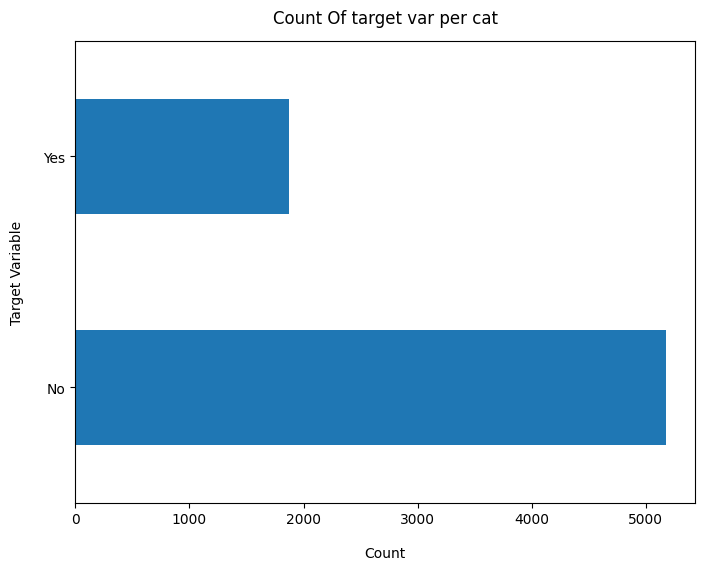

In [6]:
tbd['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target Variable",labelpad=14)
plt.title("Count Of target var per cat",y=1.02)

In [7]:
100*tbd['Churn'].value_counts()/len(tbd['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [8]:
tbd['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
tbd.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


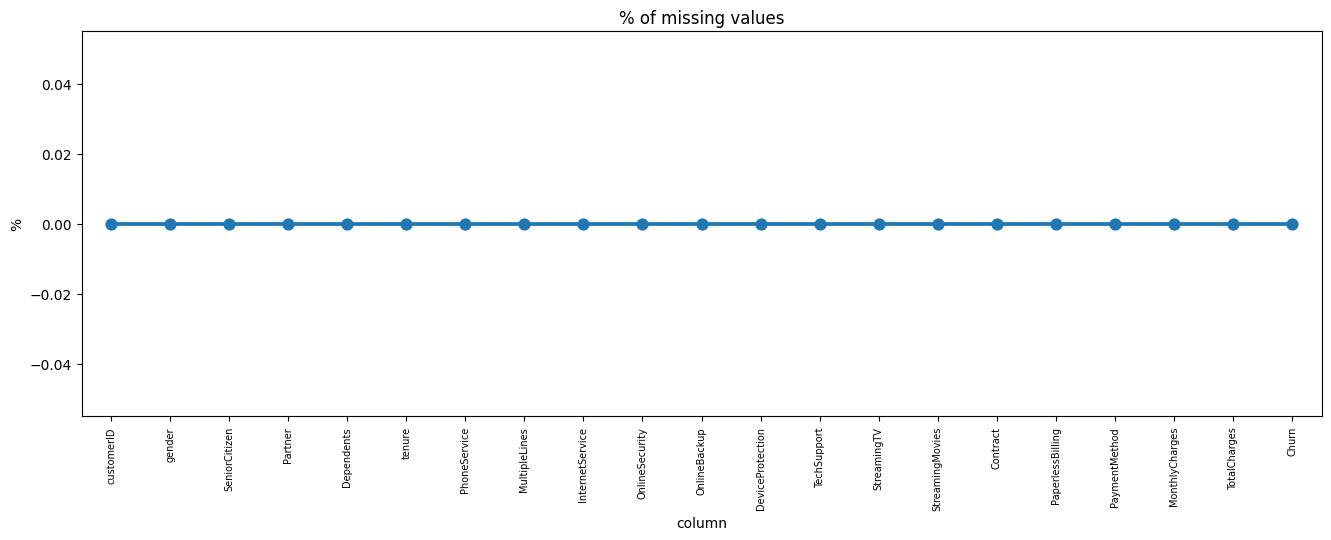

In [10]:
m=pd.DataFrame((tbd.isnull().sum())*100/tbd.shape[0]).reset_index()
m.columns = ['column', 'percent_missing'] 
plt.figure(figsize=(16,5))
# ax=sns.pointplot('index',0,data=m)   gives type error
ax = sns.pointplot(x='column', y='percent_missing', data=m)
plt.xticks(rotation=90,fontsize=7)
plt.title("% of missing values")
plt.ylabel("%")
plt.show()

In [11]:
td=tbd.copy()

In [12]:
td.TotalCharges=pd.to_numeric(td.TotalCharges,errors='coerce')
td.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
td.loc[td['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
td.dropna(how='any',inplace=True)

In [15]:
print(td['tenure'].max())

72


In [16]:
labels=["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
td['tenure_grp']=pd.cut(td.tenure,range(1,80,12),right=False,labels=labels)
        

In [17]:
td['tenure_grp'].value_counts()

tenure_grp
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [18]:
td.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
td.head()



,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


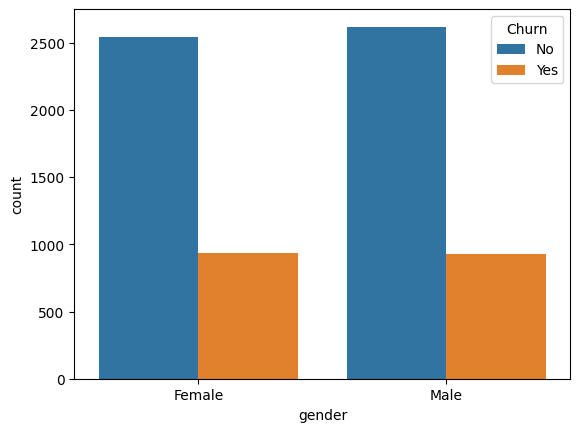

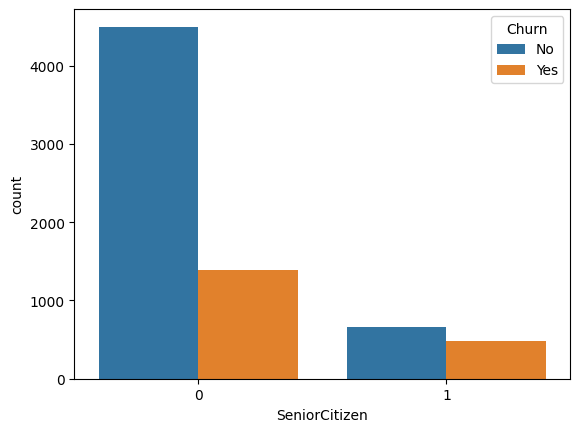

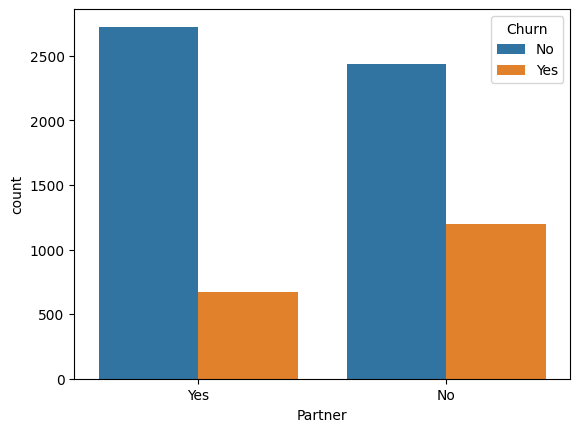

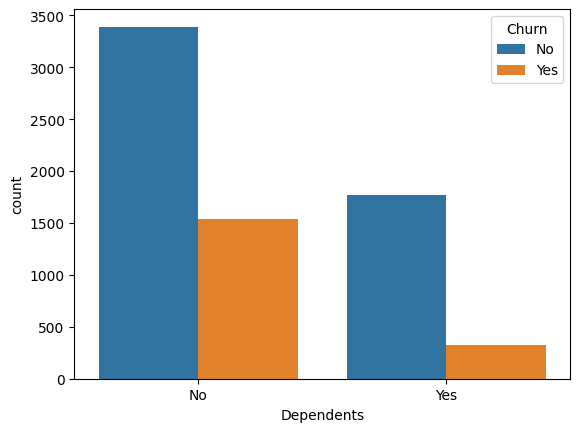

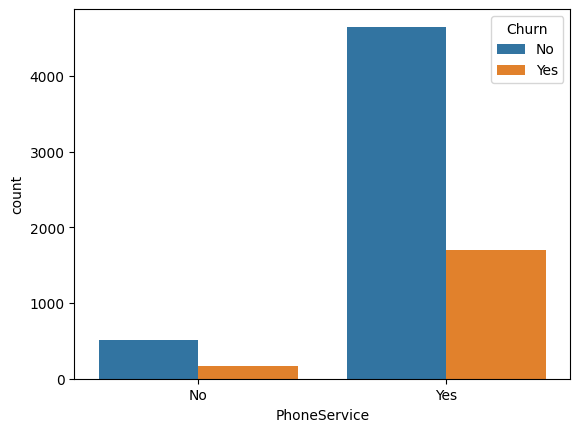

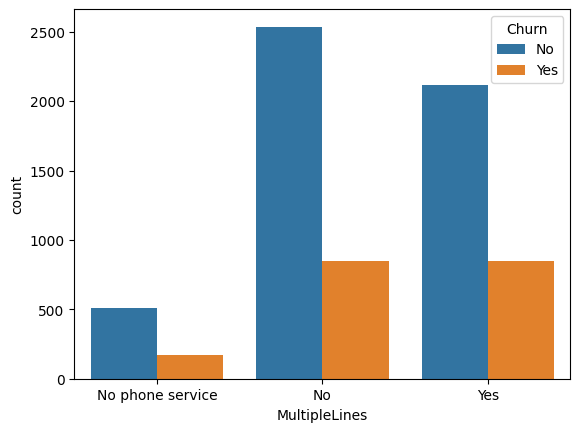

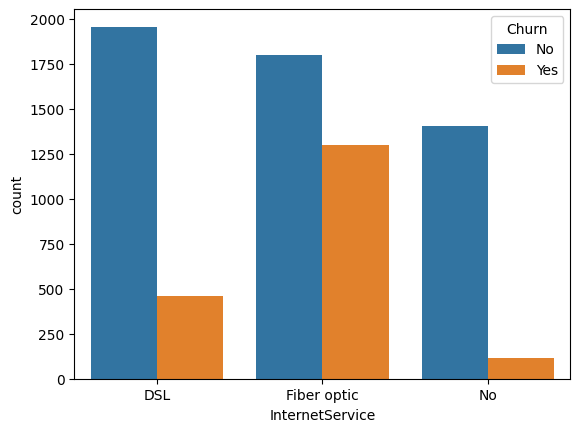

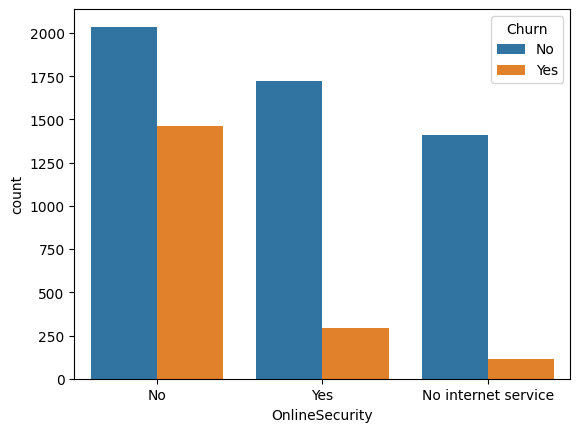

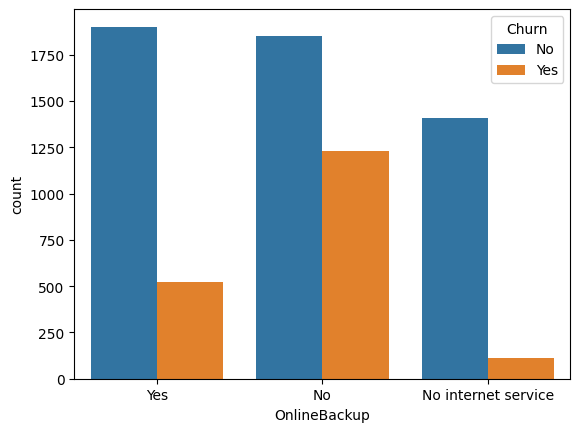

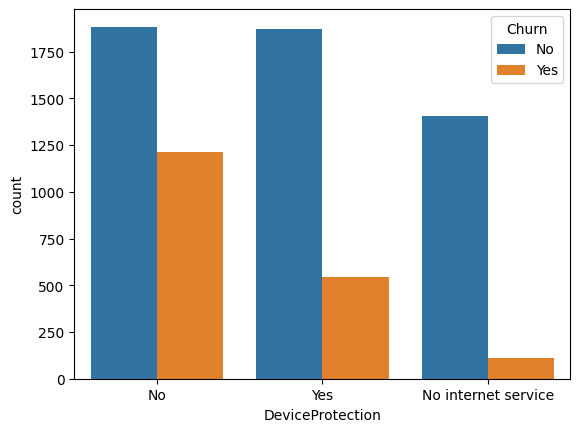

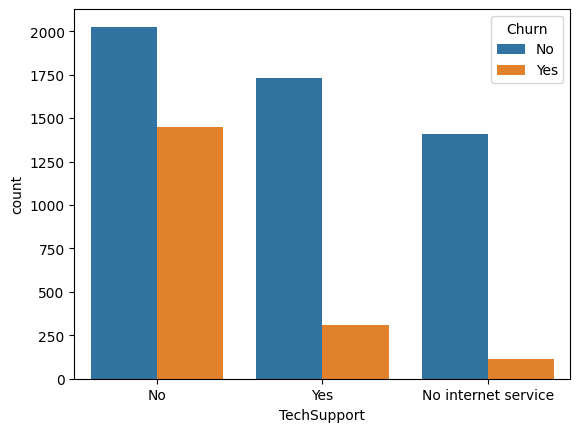

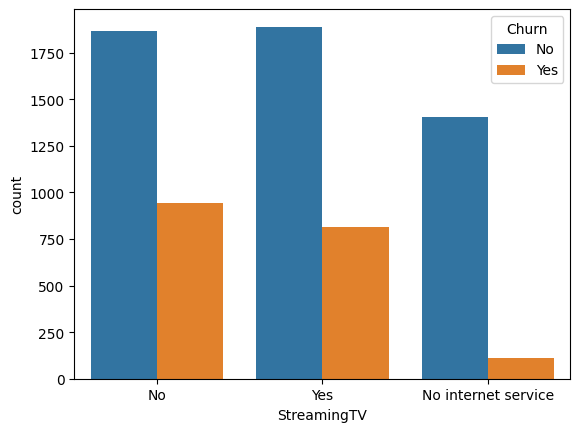

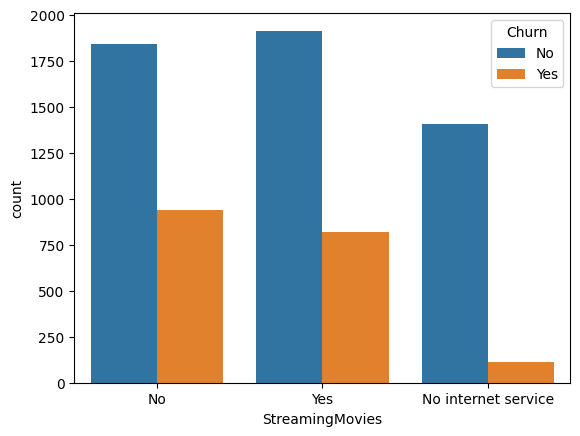

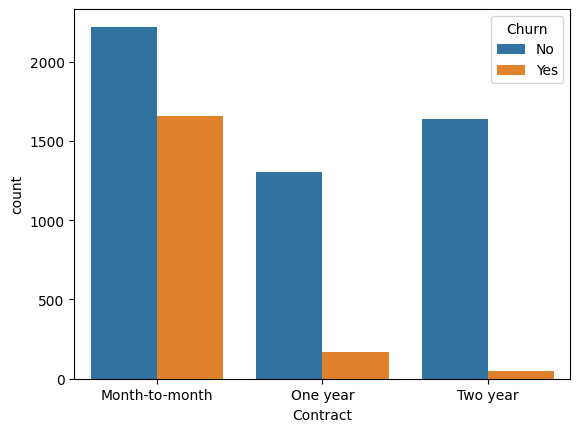

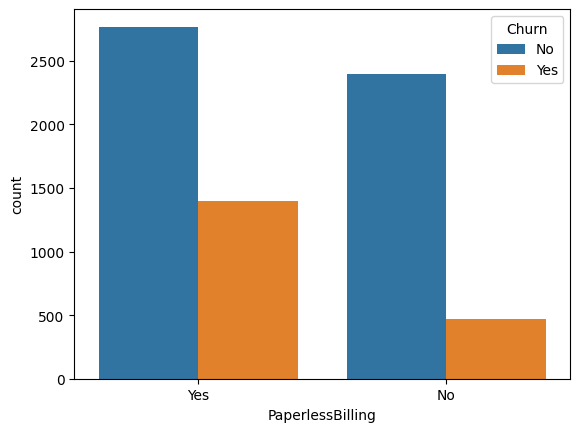

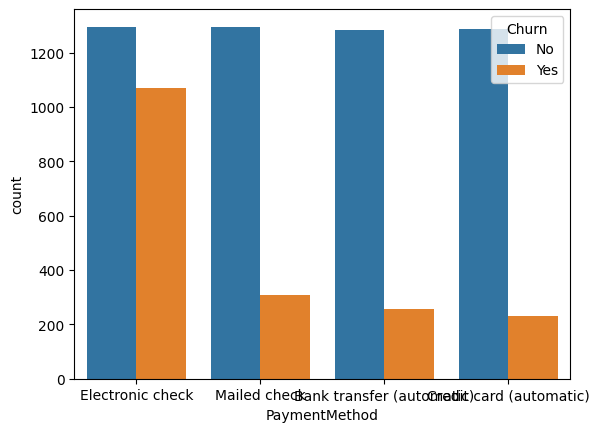

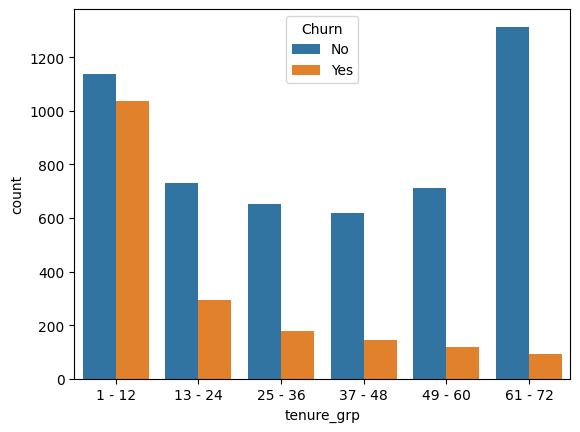

In [19]:
for i,p in enumerate(td.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=td,x=p,hue='Churn')


In [20]:
td['Churn']=np.where(td.Churn=='Yes',1,0)


In [21]:
td.head()





,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [22]:
tdd=pd.get_dummies(td)
tdd.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_1 - 12,tenure_grp_13 - 24,tenure_grp_25 - 36,tenure_grp_37 - 48,tenure_grp_49 - 60,tenure_grp_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


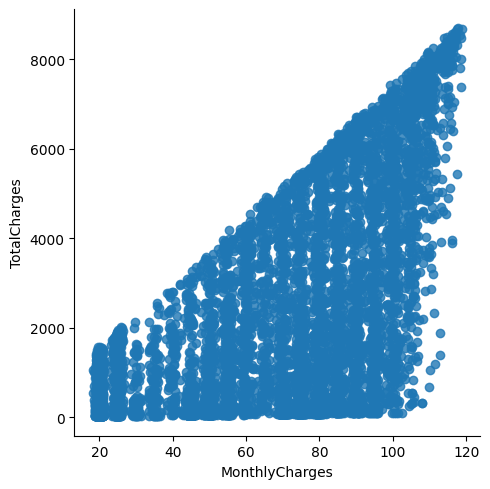

In [23]:
sns.lmplot(data=tdd, x='MonthlyCharges',y='TotalCharges', fit_reg=False)

Text(0.5, 1.0, 'Monthly Charges by churn')

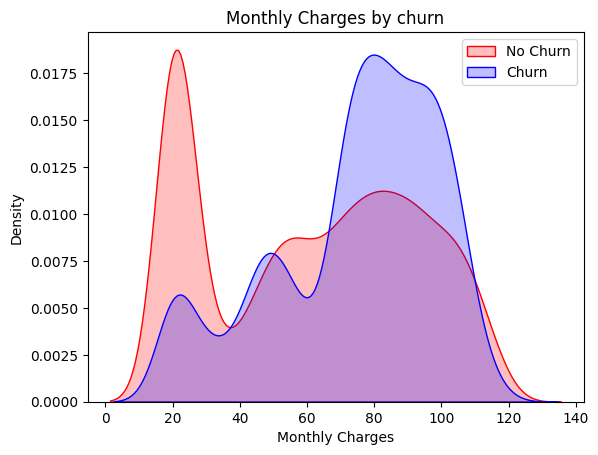

In [24]:
Mth = sns.kdeplot(tdd.MonthlyCharges[(tdd["Churn"]==0)],color="Red",fill=True)
Mth = sns.kdeplot(tdd.MonthlyCharges[(tdd["Churn"]==1)],ax=Mth,color="Blue",fill=True)
Mth.legend(["No Churn","Churn"],loc="upper right")
Mth.set_xlabel('Monthly Charges')
Mth.set_ylabel('Density')
Mth.set_title('Monthly Charges by churn')


Text(0.5, 1.0, 'Total Charges by churn')

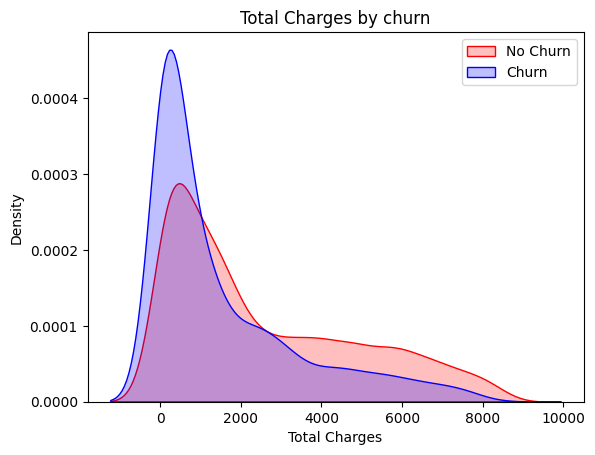

In [25]:
Mth = sns.kdeplot(tdd.TotalCharges[(tdd["Churn"]==0)],color="Red",fill=True)
Mth = sns.kdeplot(tdd.TotalCharges[(tdd["Churn"]==1)],ax=Mth,color="Blue",fill=True)
Mth.legend(["No Churn","Churn"],loc="upper right")
Mth.set_xlabel('Total Charges')
Mth.set_ylabel('Density')
Mth.set_title('Total Charges by churn')


<Axes: >

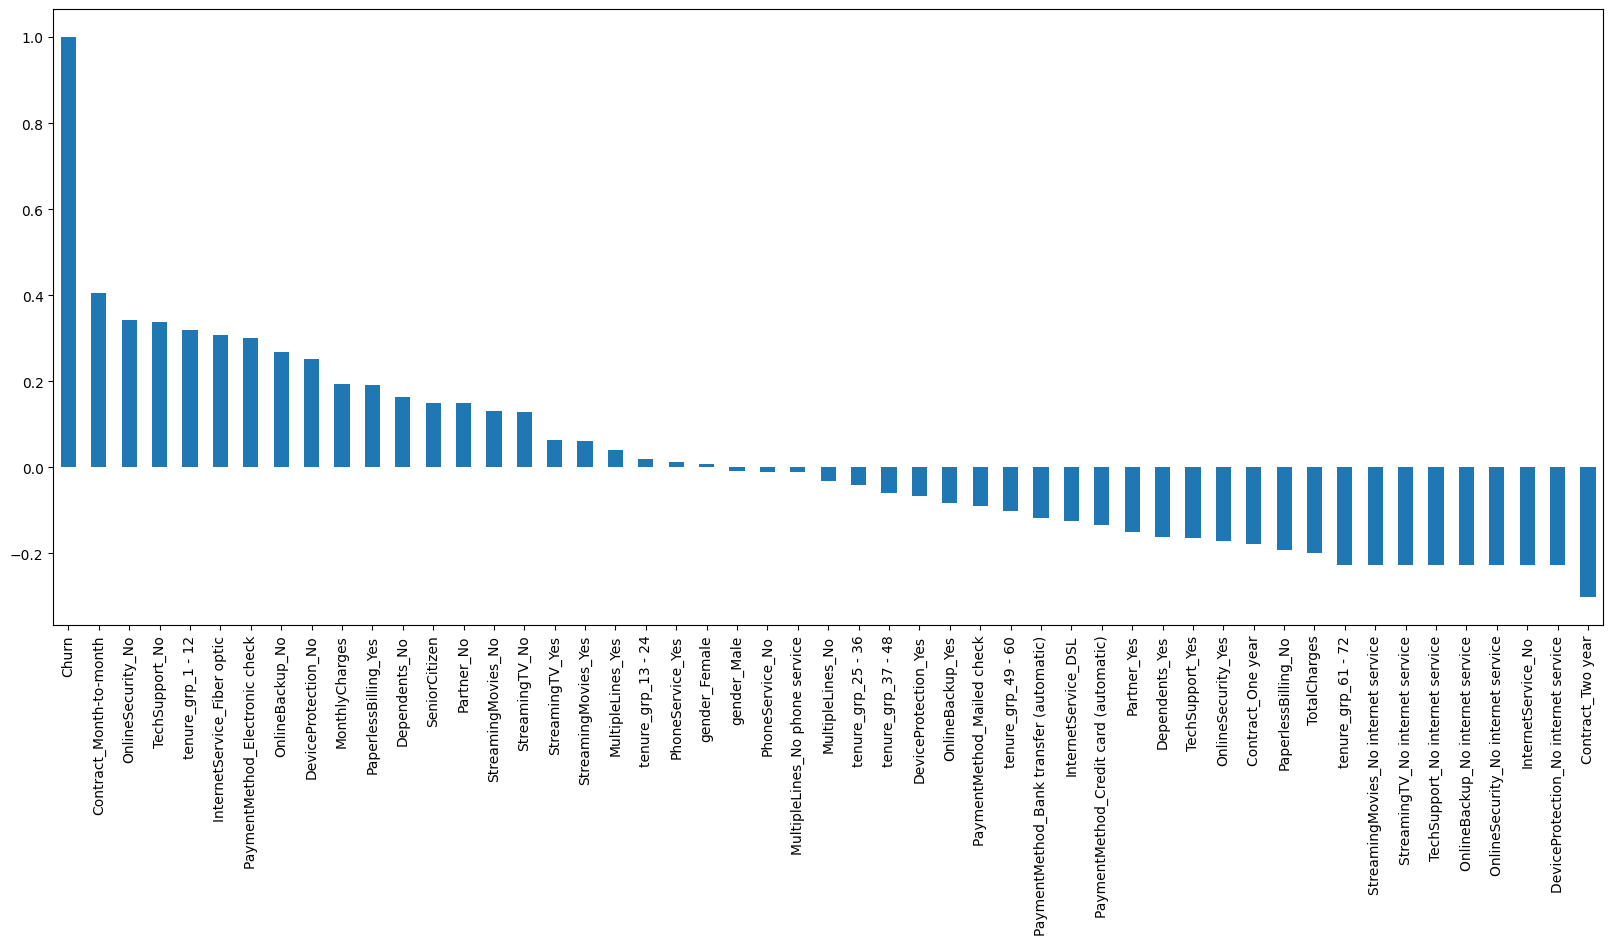

In [26]:
plt.figure(figsize=(20,8))
tdd.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')


<Axes: >

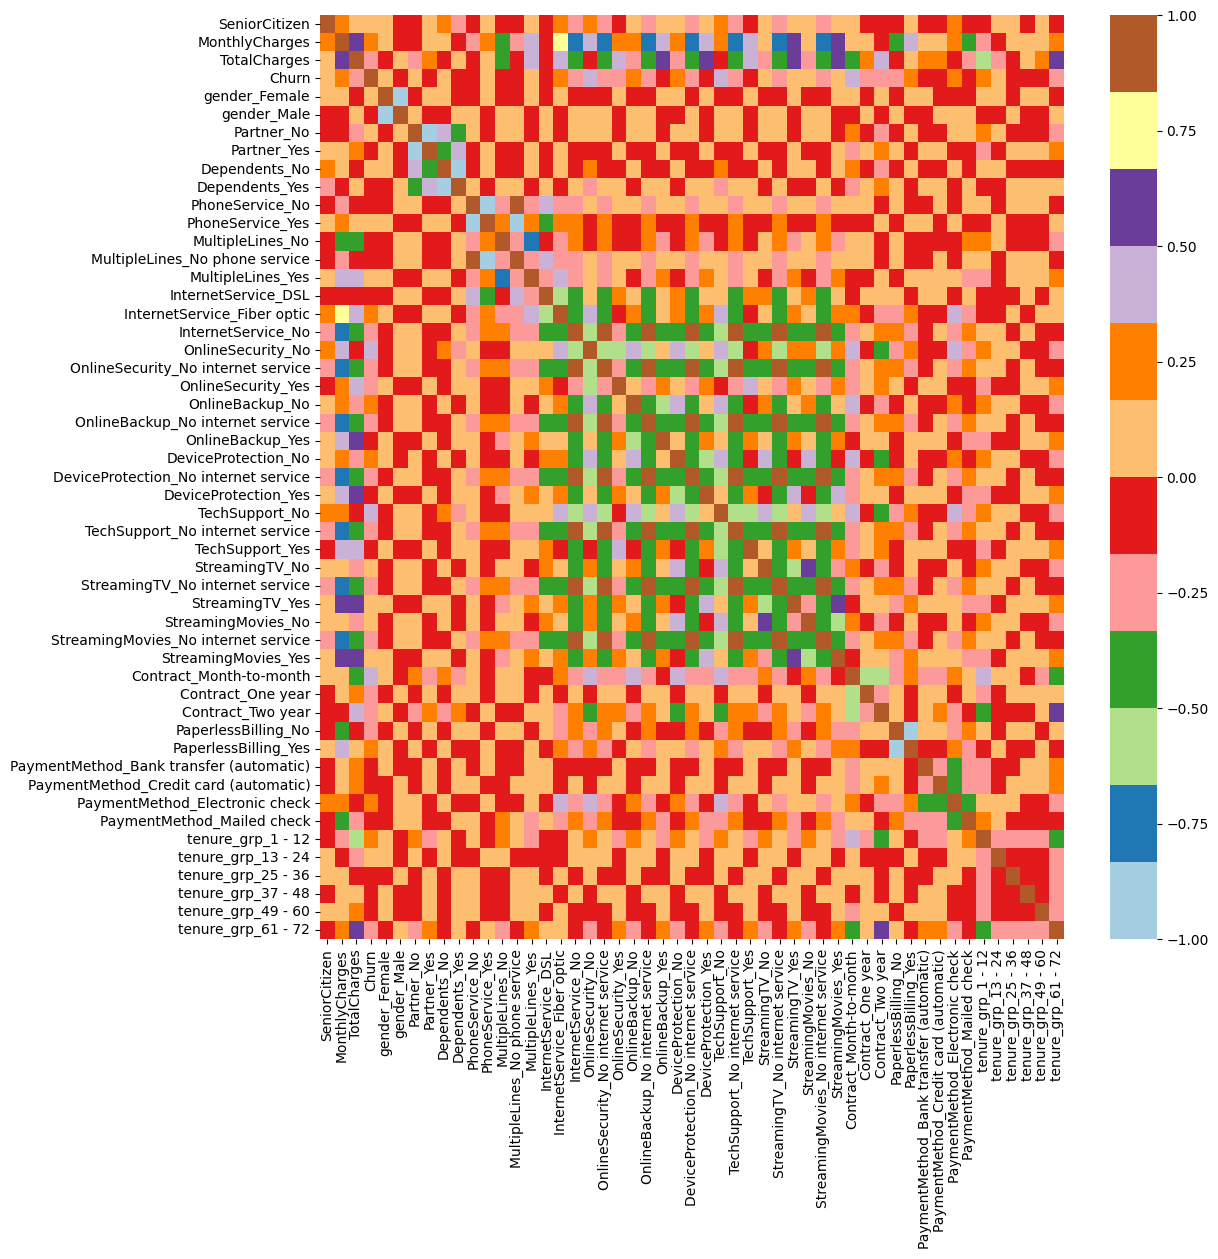

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(tdd.corr(),cmap="Paired")

In [28]:
ndt0=td.loc[td['Churn']==0]
ndt1=td.loc[td['Churn']==1]

In [29]:
# def uniplot(df,col,title,hue =None):
    
#     sns.set_style('whitegrid')
#     sns.set_context('talk')
#     plt.rcParams["axes.labelsize"] = 20
#     plt.rcParams['axes.titlesize'] = 22
#     plt.rcParams['axes.titlepad'] = 30
    
    
#     temp = pd.Series(data = hue)
#     fig, ax = plt.subplots()
#     width = len(df[col].unique()) + 7 + 4*len(temp.unique())
#     fig.set_size_inches(width , 8)
#     plt.xticks(rotation=45)
#     plt.yscale('log')
#     plt.title(title)
#     ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
#     plt.show()

def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30

    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)
    plt.xticks(rotation=45)
    plt.title(title)
    
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in DataFrame")
    if hue and hue not in df.columns:
        raise ValueError(f"Hue column '{hue}' not found in DataFrame")

    # Create a count plot
    if hue and hue in df.columns:
        if df[hue].isnull().any():
            raise ValueError(f"Hue column '{hue}' contains null values")
        sns.countplot(data=df, x=col, hue=hue, palette='bright', ax=ax)
    else:
        sns.countplot(data=df, x=col, palette='bright', ax=ax)
    
    # Fix y-axis to show counts correctly
    ax.set_yscale('linear')  # Ensure y-axis is linear
    plt.show()



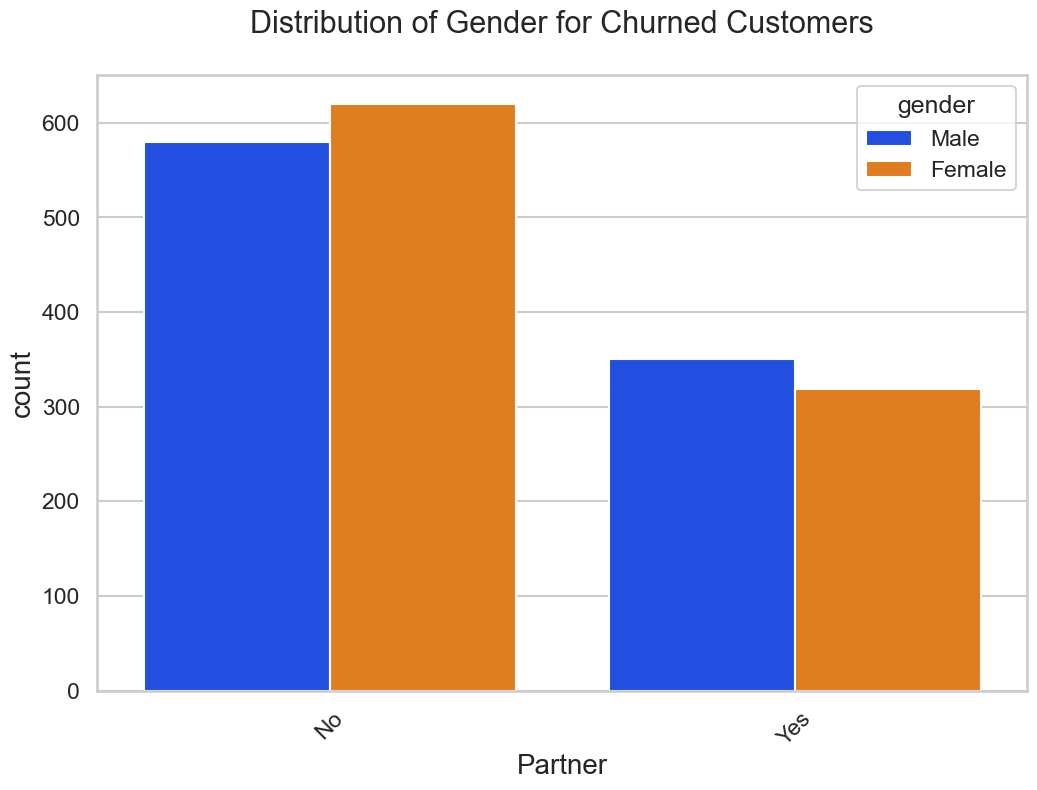

In [30]:
uniplot(df=ndt1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')
# df=new_df1_target1
# df['Partner'].value_counts()

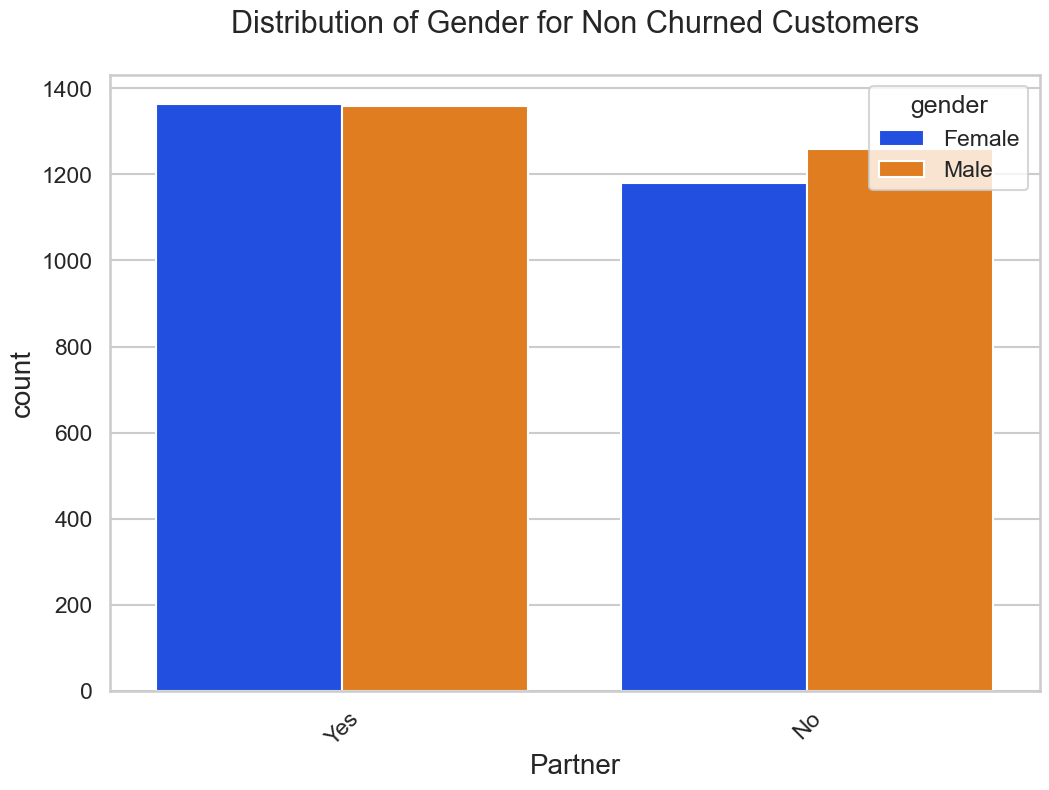

In [31]:
uniplot(ndt0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')


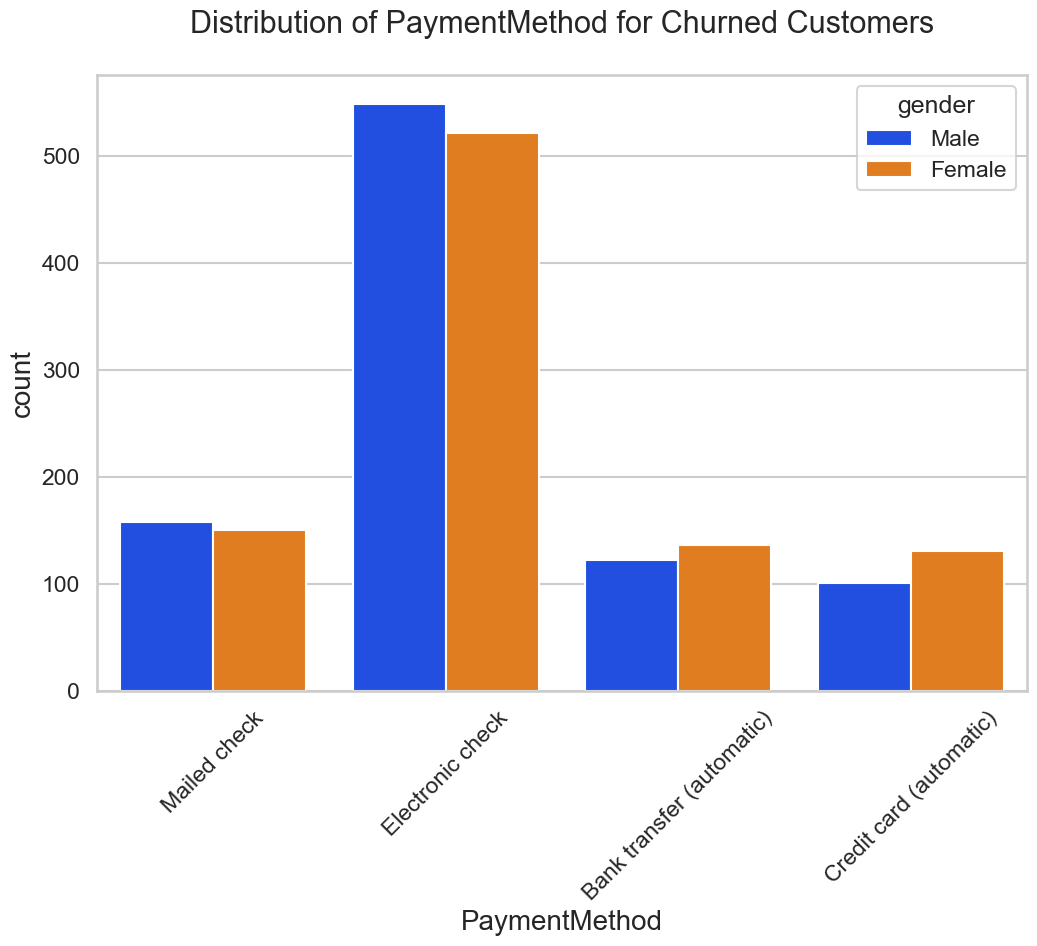

In [32]:
uniplot(ndt1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')



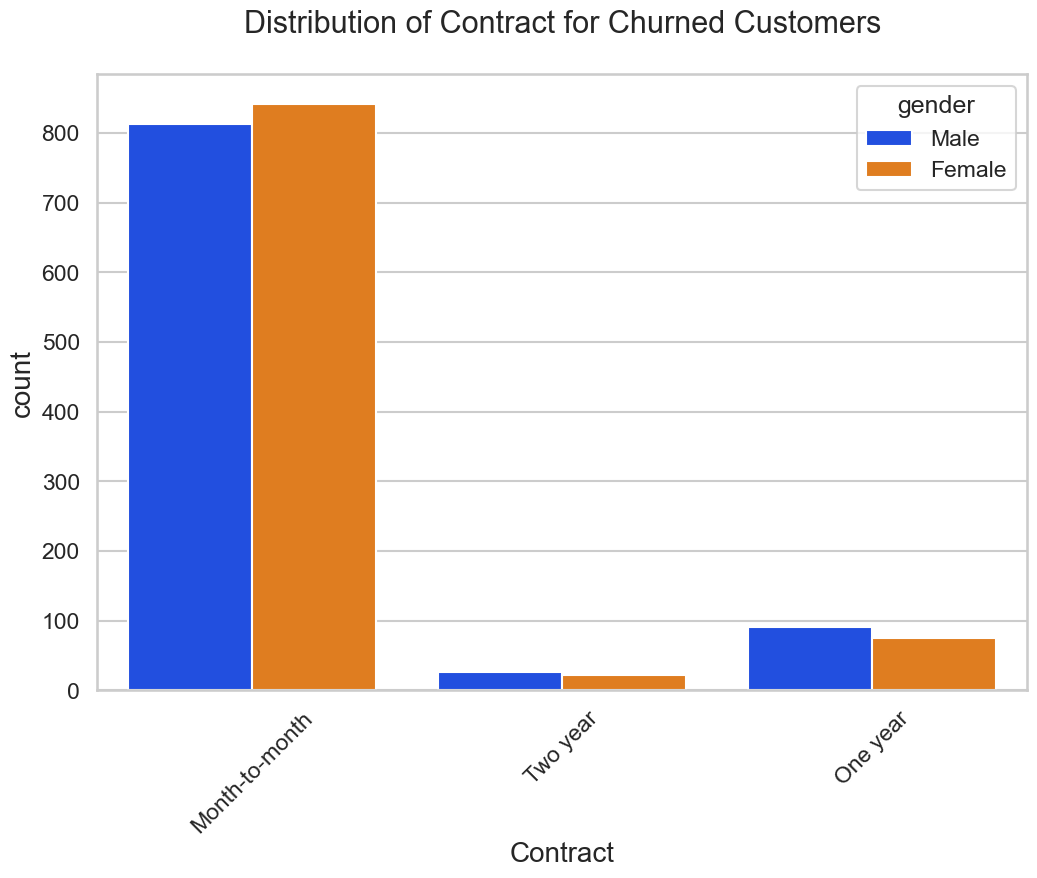

In [33]:
uniplot(ndt1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')


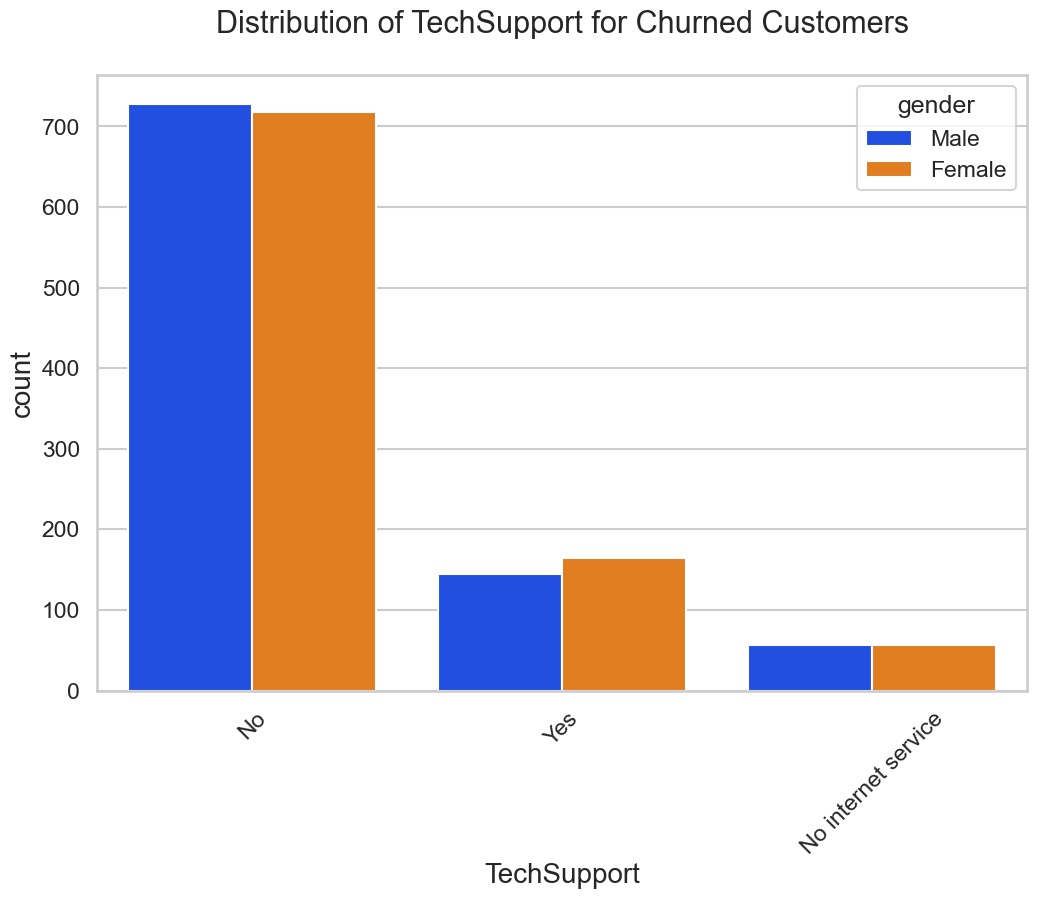

In [34]:
uniplot(ndt1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')


In [35]:
ndt1['Partner'].value_counts()

Partner
No     1200
Yes     669
Name: count, dtype: int64

In [36]:
ndt1['gender'].value_counts()

gender
Female    939
Male      930
Name: count, dtype: int64

In [37]:
ndt1['Contract'].value_counts()

Contract
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64

In [38]:
ndt1['TechSupport'].value_counts()

TechSupport
No                     1446
Yes                     310
No internet service     113
Name: count, dtype: int64

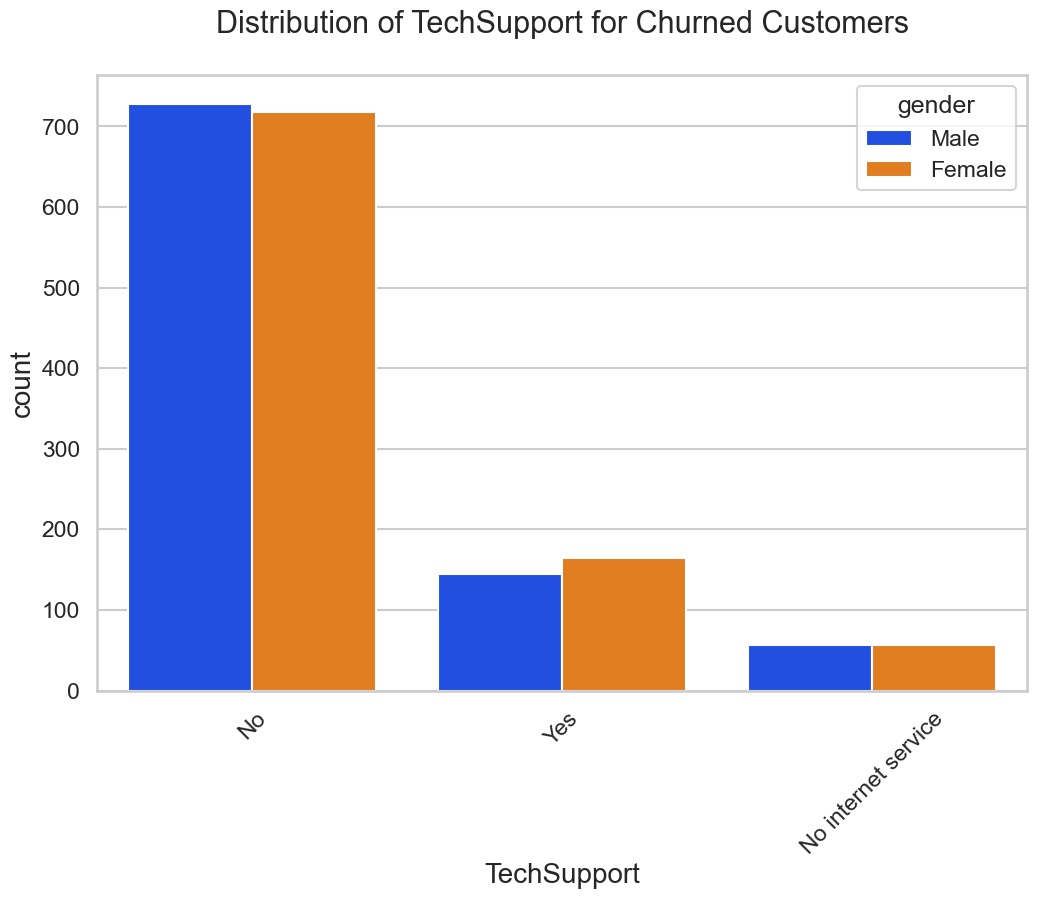

In [39]:
uniplot(ndt1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')


In [40]:
ndt1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_grp'],
      dtype='object')

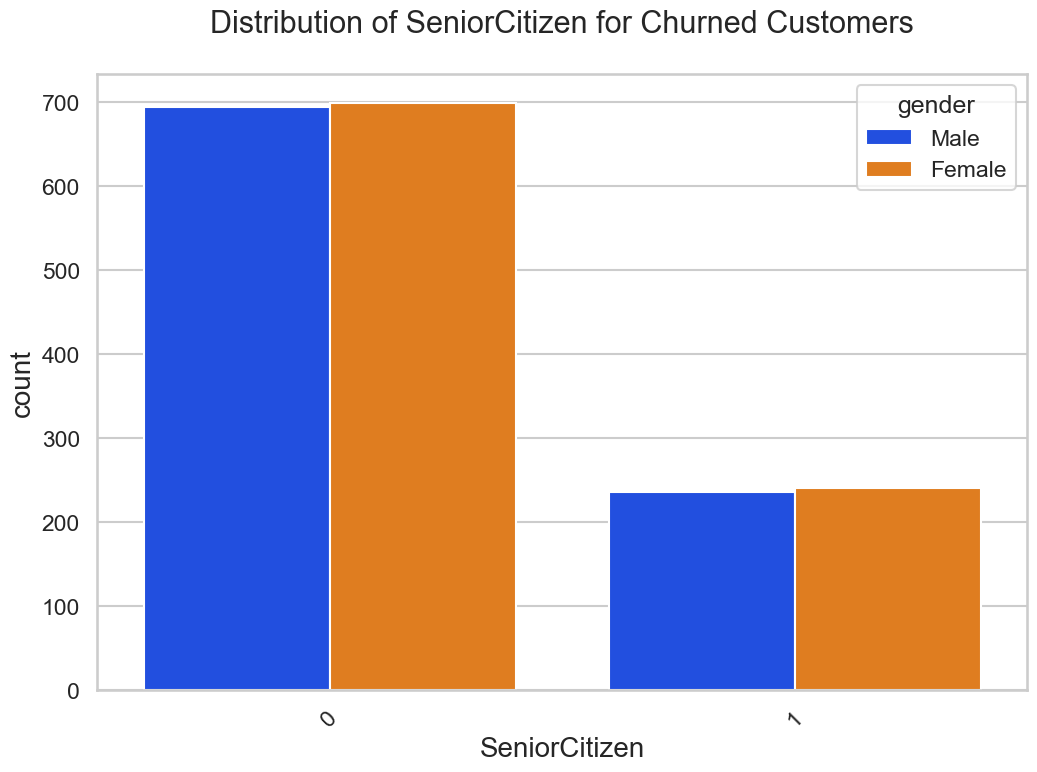

In [41]:
uniplot(ndt1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')


In [45]:
df=ndt1
print(df['Partner'].value_counts())
print(df['gender'].value_counts())

Partner
No     1200
Yes     669
Name: count, dtype: int64
gender
Female    939
Male      930
Name: count, dtype: int64


In [46]:
tdd.to_csv('tel_churn.csv')